# Capstone 3 - Data Wrangling and EDA

## About the data

The data came in a zip file I downloaded from kaggle.com for an image classification competition. It consists of 2860 images (224 x 224) of different types of balls. The zip file contained a csv file and three folders. The folder names were test, train, and valid and they contain the images. The csv file contained four columns: the filepath of each image, the label of each image as a string, whether it belonged to the test, train or valid data set folders, and the label of each iimage as an integer. The following is a breakdown of the images.

There were 2860 training images:
- 112 baseball images
- 116 basketball images
- 92 beach ball images
- 143 billiard ball images
- 145 bowling ball images
- 113 brass ball images
- 82 buckeyball images (carbon nanotube balls)
- 183 cannon ball images
- 150 cricket ball images
- 139 eye ball images
- 112 football images
- 106 golf ball images
- 131 marble images
- 137 meat ball images
- 77 medicine ball images
- 32 paint ball images
- 106 puff ball images (some kind of mushroom)
- 140 screw ball images (famous people faces)
- 167 soccer ball images
- 139 tennis ball images
- 131 volley ball images
- 139 water polo ball images (very similar to volley balls)
- 99 wiffle ball images
- 69 wrecking ball images
There were 120 test images:
- 5 baseball images
- 5 basketball images
- 5 beach ball images
- 5 billiard ball images
- 5 bowling ball images
- 5 brass ball images
- 5 buckeyball images
- 5 cannon ball images
- 5 cricket ball images
- 5 eyeball images
- 5 football images
- 5 golf ball images
- 5 marble images
- 5 meatball images
- 5 medicine ball images
- 5 paint ball images
- 5 puff ball images
- 5 screw ball images
- 5 soccer ball images
- 5 tennis ball images
- 5 volley ball images
- 5 water polo images
- 5 wiffle ball images
- 5 wrecking ball images
There were 120 valid images:
- 5 baseball images
- 5 basketball images
- 5 beach ball images
- 5 billiard ball images
- 5 bowling ball images
- 5 brass ball images
- 5 buckeyball images
- 5 cannon ball images
- 5 cricket ball images
- 5 eyeball images
- 5 football images
- 5 golf ball images
- 5 marble images
- 5 meatball images
- 5 medicine ball images
- 5 paint ball images
- 5 puff ball images
- 5 screw ball images
- 5 soccer ball images
- 5 tennis ball images
- 5 volley ball images
- 5 water polo images
- 5 wiffle ball images
- 5 wrecking ball images

## Image Classifications

I deleted 11 classes of images in order to lower the amount of images I would have to deal with, plus some of these classes are just not that exciting to me:
- billiard ball images
- buckeyball images
- cannon ball images
- eyeball images
- marble images
- meatball images
- medicine ball images
- paint ball images
- puff ball images
- screw ball images
- wrecking ball images

This means I kept these classes:
- football images
- tennis ball images
- bowling ball images
- brass ball images
- water polo ball images
- cricket ball images
- baseball images
- basketball images
- wiffle ball images
- soccer ball images
- volleyball images
- beach ball images
- golf ball images

## Processing Data

I also made it so all the classes have 97 training images. This was based on the amount of beach ball images available within the data since it had the fewest total images of all the classes kept. The data now consists of 97 training and 5 testing images per class for 13 classes for a total of 1326 images (1261 training and 65 test).

### Imports

In [1]:
import pandas as pd

import matplotlib.image as mpimg

import skimage
from skimage import color
from skimage.transform import rescale
from skimage import io

import warnings
warnings.filterwarnings("ignore")

### Processing

In [2]:
# loading the provided csv file

balls_filepath = 'ball_s.csv'
balls_df = pd.read_csv(balls_filepath)
balls_df.head()

,filepaths,labels,data set,LABELS
0,train/baseball/001.jpg,baseball,train,0
1,train/baseball/002.jpg,baseball,train,0
2,train/baseball/003.jpg,baseball,train,0
3,train/baseball/004.jpg,baseball,train,0
4,train/baseball/005.jpg,baseball,train,0


The following table maps the strings in the "labels" column with the integers in the "LABELS" column:

**labels** | baseballs | basketballs | beachballs | bowling balls | brass balls | cricket balls | footballs | golf balls | soccer balls | tennis balls | volleyballs | water polo balls | wiffle balls
:----------|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:
**LABELS** | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12

### Resizing, Grayscaling, and Flattening

In [3]:
# creates an empty dataframe meant to hold the pixel values of every image

image_count = 1326
new_width = 56       # new pixel width of images
prev_width = 224     # previous pixel width of images

pixels_df = pd.DataFrame(index=range(image_count), 
                         columns=range(new_width**2))

In [4]:
rescale_ratio = new_width / prev_width

for image in range(image_count):
    # Resizes, Grayscales, and Flattens the image
    
    filepath = balls_df.iloc[image][0]

    # pulls image from filepath
    img = mpimg.imread(filepath)
    # grays the image
    img = color.rgb2gray(img)
    # rescales the image
    img = rescale(img, rescale_ratio,  
                  anti_aliasing=True) # smoothes the image prior to rescaling
    
    # convert from float64 to uint8
    img_save = skimage.img_as_ubyte(img)
    # filepath for resized images
    new_filepath = 'resized_images/' + filepath
    # save the image
    io.imsave(new_filepath, img_save)
    
    # flattens the image into an array
    pixel_features = img.ravel()
    
    # save array in pixels_df dataframe
    for pixel in range(len(pixel_features)):
        pixels_df.iat[image,pixel] = pixel_features[pixel]
        
labels = balls_df["LABELS"]
pixels_df = pd.merge(pixels_df, labels, left_index=True, right_index=True)
pixels_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,LABELS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.631477,0.474325,0.496746,0.572291,0.542708,0.510081,0.504916,0.616837,0.552774,0.760851,...,0.592208,0.632835,0.659415,0.729234,0.753858,0.691635,0.628948,0.634593,0.634102,0
2,0.557105,0.560474,0.56906,0.571395,0.567972,0.558771,0.548537,0.543532,0.537782,0.540187,...,0.646642,0.646647,0.646909,0.648991,0.638868,0.629827,0.625742,0.621388,0.621601,0
3,0.235879,0.239107,0.23228,0.235348,0.212797,0.171313,0.164235,0.161383,0.06619,0.032078,...,0.023305,0.034938,0.038596,0.045549,0.055856,0.064795,0.071786,0.076666,0.072266,0
4,0.005088,0.004549,0.004795,0.003516,0.025543,0.06752,0.065183,0.076644,0.09908,0.089463,...,0.05338,0.055827,0.03817,0.038152,0.018193,0.015534,0.007783,0.002488,0.003079,0


## Save dataframe to csv

In [5]:
# making the trainsets

trainset = pixels_df[balls_df['data set']=='train']
testset = pixels_df[balls_df['data set']=='test']

# save trainset and testset to csv files

trainset.to_csv('trainset.csv')  # not saving column names or indexes
testset.to_csv('testset.csv')

## New images compared to old

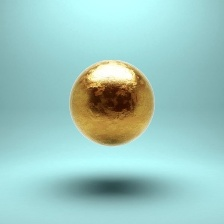 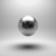

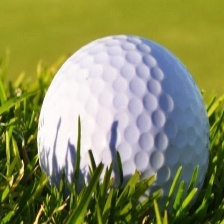 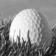

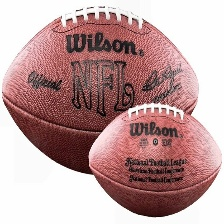 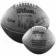

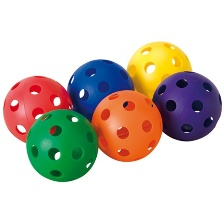 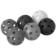

## Notes about the images (original size)

The images that were kept consist of animated and real images. 

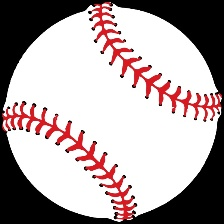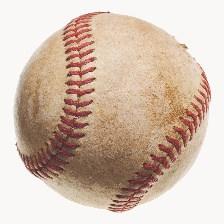

Some images contain one ball while other could have a few and others could have several. It dependes on the classification of the ball. Balls vary in size and context of where one would find that class of ball.

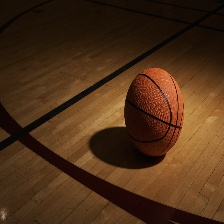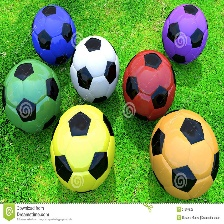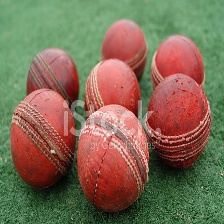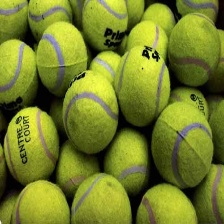

There is an image in the golf ball train file that looks like a soccer ball. It is defintely a golf ball since it has dimples but its color scheme is meant to look like a soccer ball.

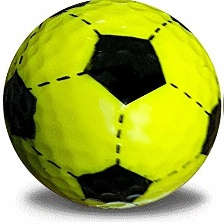

Water polo ball look very similar to volley balls and some images in both classes have nets included. However, many of the water polo ball images have water in them and obviously none of the volley ball images do.

#### **Water Polo:**

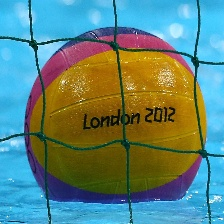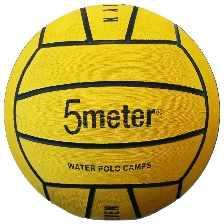

#### **Volleyball:**

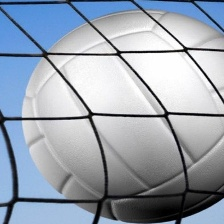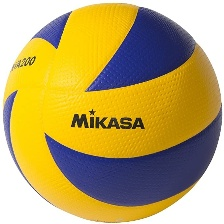